<a href="https://colab.research.google.com/github/PhaneendraYedidi/Machine-Learning-Practices/blob/master/Exploratory_Data_Analysis_Haberman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Information**:  Habermen Dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

In [2]:
#To access the haberman dataset present on Google Drive, below code was used 

# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
! pip install pydrive

# these classes allow you to request the Google drive API
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials
import pandas as pd


# 1. Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = '1CL568ARMKCu2XvcYzhvmEAN66EY-u5cW'
downloaded = drive.CreateFile({'id': file_id})
# allows you to temporarily load your file in the notebook VM

downloaded.GetContentFile('haberman.csv')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Load haberman.csv into a pandas dataFrame.
haberman = pd.read_csv("haberman.csv")

    100% |████████████████████████████████| 993kB 20.7MB/s 
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built pydrive


In [3]:
# No of data points and features
haberman.shape

(306, 4)

In [4]:
#list of columns in haberman dataset
print(haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


**Attribute Information**:

Age of patient at time of operation (numerical)

Patient's year of operation (year - 1900, numerical)

Number of positive axillary nodes detected (numerical)

Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year

In [5]:
#find if any imbalance data

haberman['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

In [6]:
haberman.head(5)

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


**Observations**: 
1.   Number of points : 306
2.   Numer of features : 3 i.e., age, year and nodes
3.   Number of classes: 1 i.e., status
4.   Data-points per class: status (1) :- 225 points,  status  (2) :- 81 points






**Objective**:
Predict the survival of patients who had undergone surgery for breast cancer.

**Univariate Analysis**

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


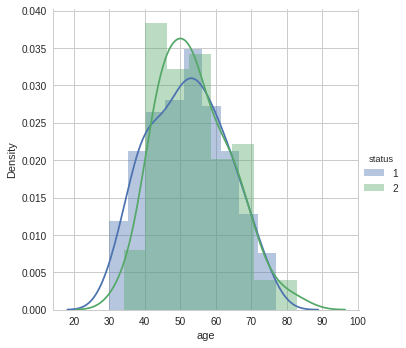

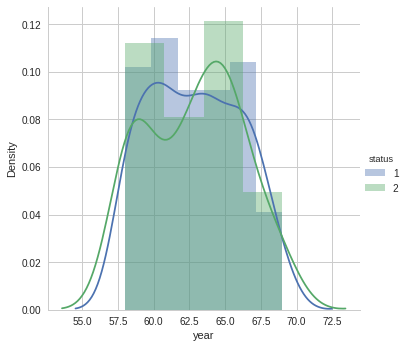

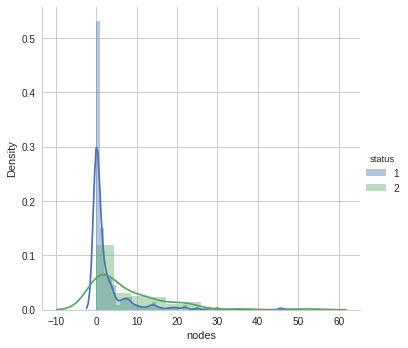

In [22]:
#Distribution plot - PDF
sns.FacetGrid(haberman, hue='status', size=5) \
  .map(sns.distplot,'age').add_legend()
plt.ylabel('Density')
sns.FacetGrid(haberman, hue='status', size=5) \
  .map(sns.distplot,'year').add_legend()
plt.ylabel('Density')
sns.FacetGrid(haberman, hue='status', size=5) \
  .map(sns.distplot,'nodes').add_legend()
plt.ylabel('Density')
plt.show();

observations: PDF for 'Age', 'Year' and 'Nodes' are mostly overlapping and no great insights can be drawn. But we can say people with 0-5 nodes have high probabality to servive and  people with nodes above 10 have less probabliity to survive

[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


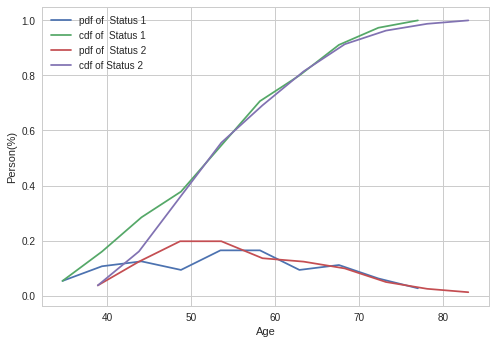

[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


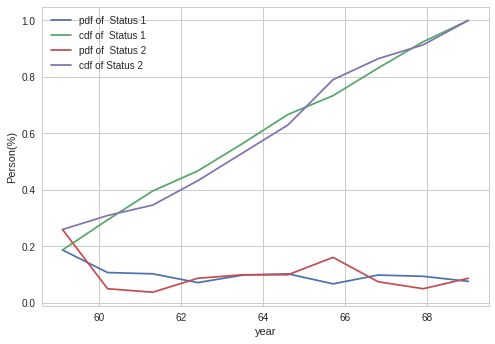

[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


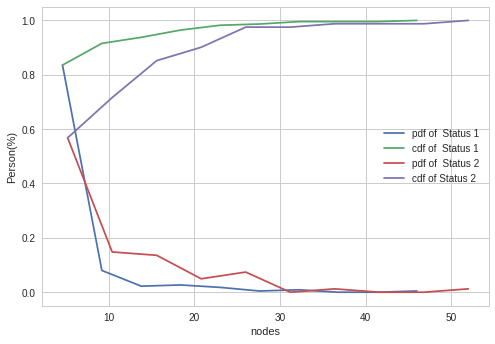

In [24]:
#Cumulative Distribution Function CDF

haberman_1 = haberman.loc[haberman['status'] == 1]
haberman_2 = haberman.loc[haberman['status'] == 2]

label = ["pdf of  Status 1", "cdf of  Status 1","pdf of  Status 2", "cdf of Status 2"]

counts, bin_edges = np.histogram(haberman_1['age'], bins=10, density = True)

pdf = counts/(sum(counts))
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

counts, bin_edges = np.histogram(haberman_2['age'], bins=10, density = True)

pdf = counts/(sum(counts))
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.ylabel('Person(%)')
plt.xlabel('Age')
plt.legend(label)
plt.show()

counts, bin_edges = np.histogram(haberman_1['year'], bins=10, density = True)

pdf = counts/(sum(counts))
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)


counts, bin_edges = np.histogram(haberman_2['year'], bins=10, density = True)

pdf = counts/(sum(counts))
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.ylabel('Person(%)')
plt.xlabel('year')
plt.legend(label)
plt.show()

counts, bin_edges = np.histogram(haberman_1['nodes'], bins=10, density = True)

pdf = counts/(sum(counts))
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

counts, bin_edges = np.histogram(haberman_2['nodes'], bins=10, density = True)

pdf = counts/(sum(counts))
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.ylabel('Person(%)')
plt.xlabel('nodes')
plt.legend(label)
plt.show()

In [29]:
#Mean and Std-Dev

print("Means:")
print('Age: ' + str(np.mean(haberman['age'])))
print('Year: ' + str(np.mean(haberman['year'])))
print('Nodes: ' + str(np.mean(haberman['nodes'])))

print("\nStandard Deviation")
print('Age: ' + str(np.std(haberman['age'])))
print('Year: ' + str(np.std(haberman['year'])))
print('Nodes: ' + str(np.std(haberman['nodes'])))

Means:
Age: 52.45751633986928
Year: 62.85294117647059
Nodes: 4.026143790849673

Standard Deviation
Age: 10.78578520363183
Year: 3.244090833563246
Nodes: 7.177896092811152


In [32]:
# Median, Percentile, Quantile, IQR, MAD

print("\nMedian")
print('Age: ' + str(np.median(haberman['age'])))
print('Year: ' + str(np.median(haberman['year'])))
print('Nodes: ' + str(np.median(haberman['nodes'])))

print('\nQuantiles')
print('Age: ' + str(np.percentile(haberman['age'],np.arange(0,100,25))))
print('Year: ' + str(np.percentile(haberman['year'],np.arange(0,100,25))))
print('Nodes: ' + str(np.percentile(haberman['nodes'],np.arange(0,100,25))))

print("\n 90th percentile")
print('Age: ' + str(np.percentile(haberman['age'],90)))
print('Year: ' + str(np.percentile(haberman['year'],90)))
print('Nodes: ' + str(np.percentile(haberman['nodes'],90)))

from statsmodels import robust
print("\n Median Absolute Deviation")
print('Age: ' + str(robust.mad(haberman['age'])))
print('Year: ' + str(robust.mad(haberman['year'])))
print('Nodes: ' + str(robust.mad(haberman['nodes'])))



Median
Age: 52.0
Year: 63.0
Nodes: 1.0

Quantiles
Age: [30.   44.   52.   60.75]
Year: [58.   60.   63.   65.75]
Nodes: [0. 0. 1. 4.]

 90th percentile
Age: 67.0
Year: 67.0
Nodes: 13.0

 Median Absolute Deviation
Age: 11.860817748044816
Year: 4.447806655516806
Nodes: 1.482602218505602


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


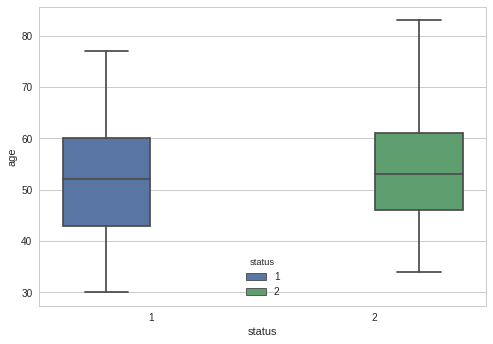

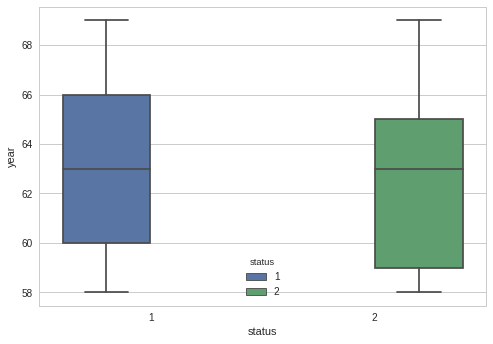

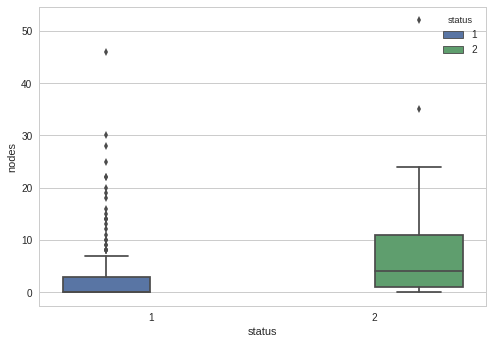

In [33]:
#Box plots and Whiskers
sns.boxplot(x='status', y='age', data=haberman, hue='status')
plt.show()

sns.boxplot(x='status', y='year', data=haberman, hue='status')
plt.show()

sns.boxplot(x='status', y='nodes', data=haberman, hue='status')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:637: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data[hue_mask])
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:932: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data[hue_mask])


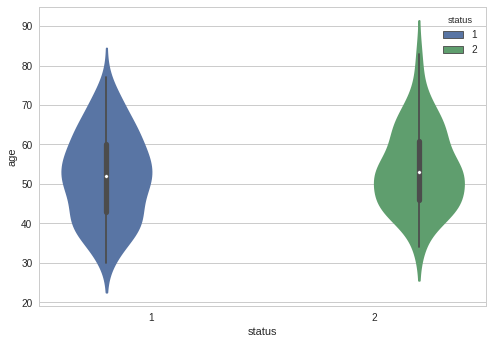

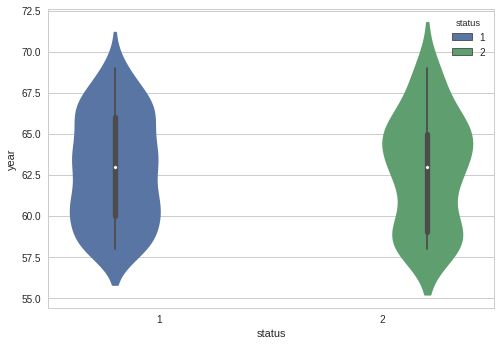

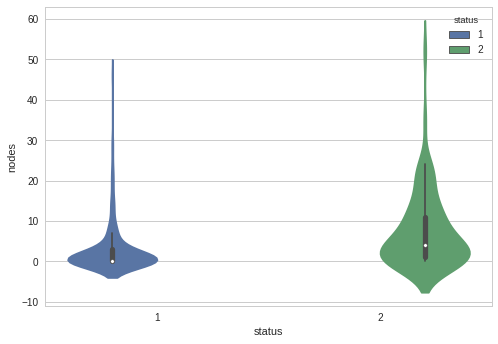

In [34]:
#violin plot
sns.violinplot(x="status", y="age", data=haberman, size=8, hue='status')
plt.show()

sns.violinplot(x="status", y="year", data=haberman, size=8, hue='status')
plt.show()

sns.violinplot(x="status", y="nodes", data=haberman, size=8, hue='status')
plt.show()

Observations: 15% persons survived when age is less than or equal to 37 and when the age is above 78, the people died with in 5 years.
When the nodes are above 46, the patients are not survived


**Bi-Variate Analysis**

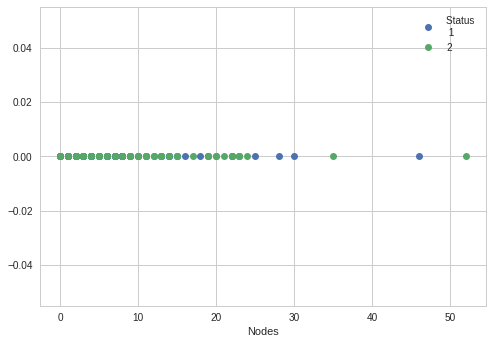

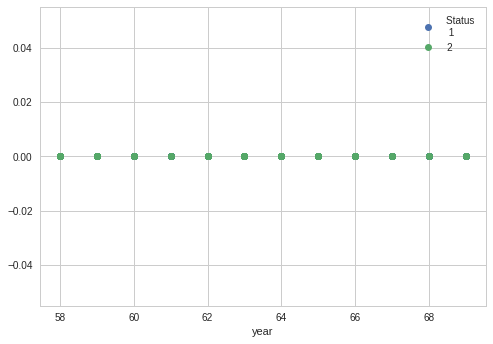

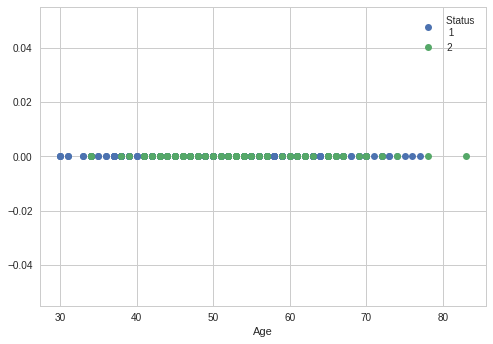

In [38]:
#1-D scatter plot
haberman_1 = haberman.loc[haberman['status'] == 1]
haberman_2 = haberman.loc[haberman['status'] == 2]

plt.plot(haberman_1['nodes'], np.zeros_like(haberman_1['nodes']),'o',label='Status \n 1')
plt.plot(haberman_2['nodes'], np.zeros_like(haberman_2['nodes']),'o',label='2' )
plt.legend()
plt.xlabel('Nodes')
plt.show()

plt.plot(haberman_1['year'], np.zeros_like(haberman_1['year']),'o',label='Status \n 1')
plt.plot(haberman_2['year'], np.zeros_like(haberman_2['year']),'o',label='2')
plt.xlabel('year')
plt.legend()
plt.show()

plt.plot(haberman_1['age'], np.zeros_like(haberman_1['age']),'o',label='Status \n 1')
plt.plot(haberman_2['age'], np.zeros_like(haberman_2['year']),'o',label='2')
plt.xlabel('Age')
plt.legend()
plt.show()

Observations: By looking at the Age 1-D scatter plot, we can say that the many persons died when age lies between 41 - 57.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


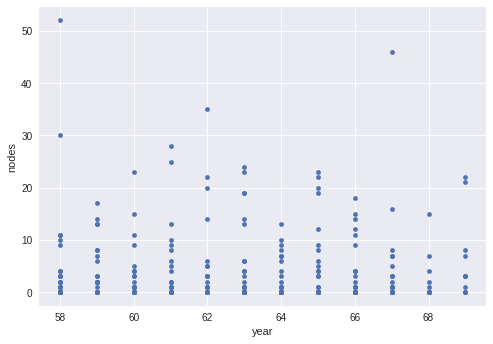

In [14]:
#2-D scatter plot
haberman.plot(kind='scatter',x='year',y='nodes');
plt.show();

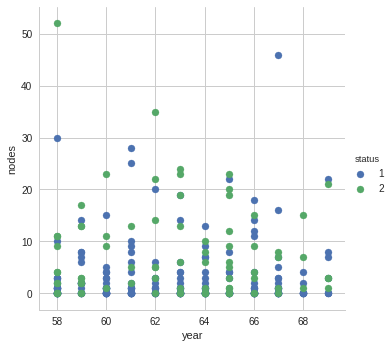

In [15]:
#2-D scatter plot with color coding based on each status
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue = "status", size = 5).map(plt.scatter, "year","nodes").add_legend();
plt.show();

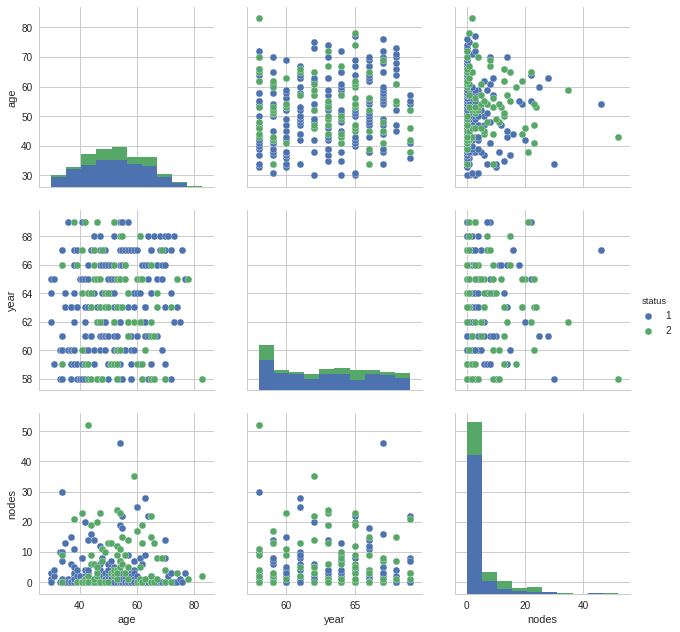

In [16]:
#Pair plot
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="status", vars=['age','year','nodes'], size=3);
plt.show();

Observations: From the above analysis 'status' cannot be linearly separable. when the nodes are in range 0-5 the % of persons survived is greater than the % of persons died

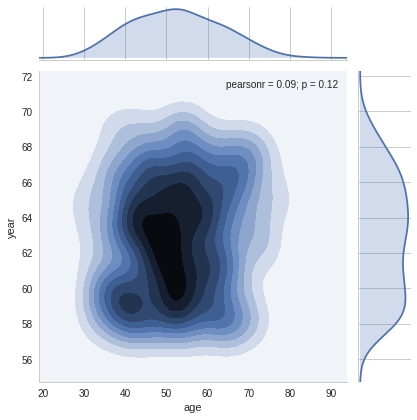

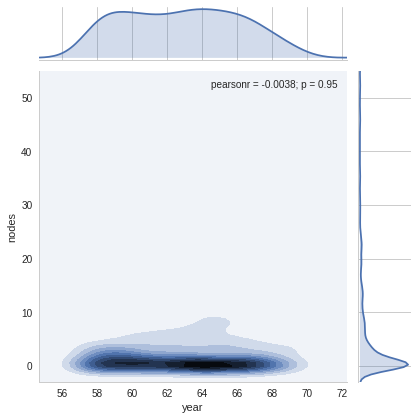

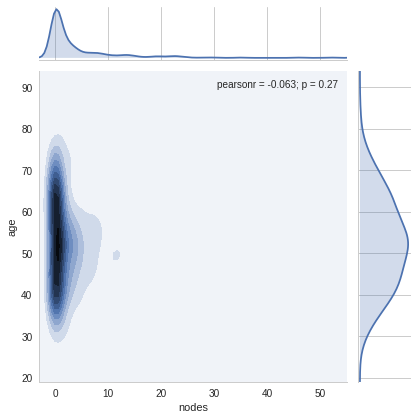

In [17]:
#Density or contour plot

sns.jointplot(x='age',y='year',data=haberman,kind='kde')
plt.show()

sns.jointplot(x='year',y='nodes',data=haberman,kind='kde')
plt.show()

sns.jointplot(x='nodes',y='age',data=haberman,kind='kde')
plt.show()

**Conclusion**:
1. The haberman dataset is imbalanced dataset as it contains more no of status 1(225) vaues than status 2(81).
2. Status class cannot be linearly separable as there is lot of overlapping of data.
3. We cannot find the most useful feature but to some extent 'node' is more informative than others. Next comes Age and then year.
